Przewidywanie zakażenia wirusem SARS-Cov-2 na podstawie danych pacjenta oraz testów klinicznych.

Rafał Ciesnowski, 253982

In [98]:
import numpy as np 
import pandas as pd 

Pracujemy na bazie danych "Diagnosis of COVID-19 and its clinical spectrum", dotyczącej wyników testów na SARS-Cov-2 i towarzyszącym wynikom badań.
Powyżej zaimportowaliśmy bibliotekę numpy służącą do obróbki liczb i macierzy, bibliotekę pandas pomocną przy zbiorach danych, i matplotlib który przyda się potem do tworzenia wykresów.
Poniżej wczytujemy bazę danych. Przykładowy fragment tabeli wygląda następująco:

In [99]:
dane = pd.read_excel('dataset.xlsx', index_col=0)
dane.head(10)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN


Używając shape dowiadujemy się, że baza danych ma wyjściowo 5644 rekordów, opisanych 110 kolumnami.

In [100]:
dane.shape

(5644, 110)

Aby lepiej przyjrzeć się charakterystyce każdej kolumny, używamy metody describe. Możemy wyczytać wartości średnie, odchylenie standardowe, wartości poszczególnych kwartyli.

In [101]:
dane.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
"Patient addmited to intensive care unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00726435,0.0849286,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),27,NaN,NaN,NaN,6.07084e-09,1.01905,-2.98559,-0.539721,0.0563319,0.50851,2.02947
pO2 (arterial blood gas analysis),27,NaN,NaN,NaN,-2.46973e-08,1.01905,-1.17591,-0.81699,-0.159955,0.450009,2.20537
Arteiral Fio2,20,NaN,NaN,NaN,4.65661e-09,1.02598,-1.53293,-0.121498,-0.0117437,-0.0117437,2.84186
Phosphor,20,NaN,NaN,NaN,6.33299e-09,1.02598,-1.48053,-0.55273,-0.138182,0.276365,2.86235


Jak widać, baza danych jest pełna wartości NaN - czyli pustych pól. Możemy wyszukać takie kolumny, dla których ponad 95% wierszy nie posiada rzadnej wartości, i usunąć je. Jest takich kolumn 65.

In [102]:
puste = dane.isnull().sum().sort_values(ascending=False) 
niepuste = dane.notnull().sum().sort_values(ascending=False) 
procent_pustych = puste/(puste+niepuste) * 100
tabela_pustych = pd.concat({'Puste': puste, 'Niepuste': niepuste, 'Procent pustych': procent_pustych}, axis=1)
tabela_pustych[tabela_pustych['Procent pustych']>95]

,Puste,Niepuste,Procent pustych
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
...,...,...,...
Direct Bilirubin,5462,182,96.775337
Total Bilirubin,5462,182,96.775337
Serum Glucose,5436,208,96.314670
Alanine transaminase,5419,225,96.013466


Usuwamy kolumny w których mniej niż 5% wierszy ma dane.

In [103]:
nieznaczace_kolumny = [row for row in tabela_pustych[tabela_pustych['Procent pustych']>=95].index]
dane.drop(columns=nieznaczace_kolumny, inplace=True)
dane.shape

(5644, 45)

Pozostałe wartości NaN zastępujemy zerami. Aby uniknąć nieprzypadkowości w uporządkowaniu tabeli, która zaburzałaby podział na zestaw uczący i zestaw testowy, 'tasujemy' rekordy w tabeli metodą .sample.
Następnie zastępujemy wartości opisowe wartościami booleańskimi, tam gdzie to możliwe.

In [104]:
# zastępujemy NaN zerem
dane = dane.fillna(0)

# 'tasujemy' wiersze w tabeli
dane = dane.sample(frac=1).reset_index(drop=True)

# zamieniamy wartości opisowe na booleanskie
dane.replace('not_detected', 0, inplace=True)
dane.replace('detected', 0, inplace=True)
dane.replace('absent', 0, inplace=True)
dane.replace('present', 1, inplace=True)
dane.replace('negative', 0, inplace=True)
dane.replace('positive', 1, inplace=True)

# rozmiar tabeli po oczyszczeniu
dane.head(10)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Strepto A
0,11,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
1,17,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,9,0,0,0,0,-0.679027,-0.774212,-0.580222,0.010677,-1.132120,...,0,-0.569917,-0.290609,-0.521453,-0.529106,-0.058626,-0.215628,0,0,0
3,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,18,0,0,0,1,-2.830554,-2.716547,-0.241053,1.244801,-2.948047,...,0,0.000000,11.246569,1.918597,3.812977,-1.047272,4.096930,0,0,0
5,17,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
6,11,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
7,11,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
8,12,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
9,11,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0


Chcemy stworzyć klasyfikator, który na podstawie danych pozwoliłby przewidzieć, czy pacjent jest zakażony wirusem SARS-Cov-2. W takim wypadku do zbioru X będą należeć wszystkie kolumny oprócz kolumny trzeciej, zawierającej wynik badania.

Podzielmy bazę danych na zbiór uczący i testowy. Możemy ustawić wielkość zbioru testowego jako 10% wszystkich danych - liczba jest wciąż na tyle duża, że będzie to reprezentacyjna próbka.

In [105]:
# podział na dane i szukane oraz dane uczące i dane testowe
from sklearn.model_selection import train_test_split
target = dane['SARS-Cov-2 exam result']
features = dane.select_dtypes(exclude=[object])
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.1, random_state=42, stratify = target)

print("Przypadki w zbiorze uczącym: %d" % y_train.shape)
print("Zakażenia w zbiorze uczącym: %f" % (float("%f" % (y_train == 1).sum(axis=0))*100/float("%f" % y_train.shape)) + "%")
print()
print("Przypadki w zbiorze uczącym: %d" % y_test.shape)
print("Zakażenia w zbiorze uczącym: %f" % (float("%f" % (y_test == 1).sum(axis=0))*100/float("%f" % y_test.shape)) + "%")

Przypadki w zbiorze uczącym: 5079
Zakażenia w zbiorze uczącym: 9.883835%

Przypadki w zbiorze uczącym: 565
Zakażenia w zbiorze uczącym: 9.911504%


Zacznijmy implementować jedną z metod klasyfikacji: k-najbliższych sąsiadów. Jest ona dostępna w biliotece sklearn.

Biblioteka oferuje też narzędzie GridSearchCV, umożliwiające wyszukanie najkorzystniejszej liczby sąsiadów do wykorzystania w modelu.

In [106]:
# K-najbliższych sąsiadów

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# szukamy najlepszej liczby sąsiadów
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,20)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)

# najlepsza liczba sąsiadów
print("Najlepsza liczba sąsiadów: {}" .format(knn_cv.best_params_['n_neighbors']))

# najlepszy wynik (dla tego parametru)
print("Najlepszy wynik: {}" .format(knn_cv.best_score_))

Najlepsza liczba sąsiadów: 15
Najlepszy wynik: 0.9966527675419883


Wykorzystując ten parametr, możemy uruchomić model na komplecie danych uczących.

Następnie sprawdzamy, jak radzi sobie na danych uczących.

In [107]:
# przewidywanie targetu dla danych testowych
y_pred = knn_cv.predict(X_test)

# dokładność
print("Dokładność dla danych uczących: {}" .format(knn_cv.score(X_train,y_train)))
print("Dokładność dla danych testowych: {}" .format(knn_cv.score(X_test,y_test)))

Dokładność dla danych uczących: 0.9968497735774758
Dokładność dla danych testowych: 0.9946902654867257


Biblioteka sklearn oferuje szereg opcji do opisu klasyfikatora. classification_report podaje wartości głównych metryk, między innymi dokładność i support.

In [108]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       509
           1       1.00      0.95      0.97        56

    accuracy                           0.99       565
   macro avg       1.00      0.97      0.98       565
weighted avg       0.99      0.99      0.99       565



Kolejną funkcją jest plot_confusion_matrix, dzięki której generujemy macierz błędu. Widzimy, że fałszywe negatywy zdażają się częściej niż fałszywe pozytywy.

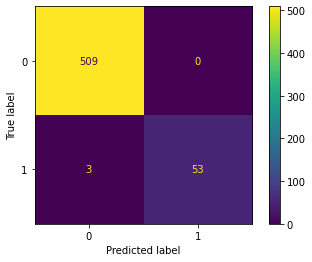

In [109]:
plot_confusion_matrix(knn_cv, X_test, y_test)
plt.show()

Porównajmy zastosowany klasyfikator z dwoma innymi metodami: regresją logistyczną i jądrami SVM. Oprócz dokładności interesuje nas też tzw. learning curve, czyli prędkość z jaką algorytm poprawia swoje wyniki.

Przedstawiamy dane na wykresie. 

Skuteczność końcowa: regresja logistyczna 100.00%
Skuteczność końcowa: jadro SVM 100.00%
Skuteczność końcowa: k-najblizsi 99.67%


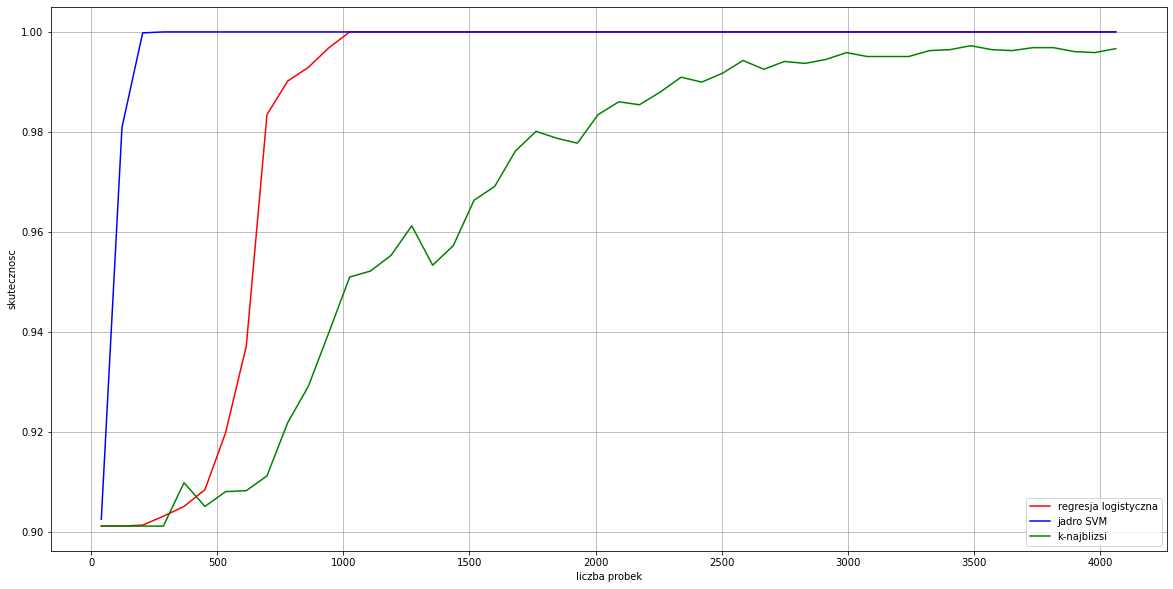

In [110]:
from sklearn import datasets, svm
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = X_train
y = y_train

regresja_log = LogisticRegression(C=0.1)
regresja_log.fit(X, y)

jadro_svm = svm.SVC(kernel='linear', C=0.1)
jadro_svm.fit(X, y)

k_naj = KNeighborsClassifier(int(knn_cv.best_params_['n_neighbors']), weights="uniform")
k_naj.fit(X, y)

    
metody = [(regresja_log, "r", "regresja logistyczna"), (jadro_svm, "b", "jadro SVM"), (k_naj, "g", "k-najblizsi")]

plt.figure(figsize= (20,10))
plt.grid()
plt.ylabel("skutecznosc")
plt.xlabel("liczba probek")
for metoda, kolor, nazwa in metody:
    train_sizes, train_scores, test_scores = learning_curve(metoda, X, y, n_jobs=-1, cv=None, train_sizes=np.linspace(0.01, 1, ), verbose=0)
    test_scores_mean = np.mean(test_scores, axis=1)
    print("Skuteczność końcowa: " + nazwa + " {:.2f}".format(test_scores_mean[-1]*100) + "%")
    plt.plot(train_sizes, test_scores_mean, color=kolor, label=nazwa)
plt.legend()
plt.show()